<a href="https://colab.research.google.com/github/xeqoir/Data-Science/blob/main/Unit7/YaleXie_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-986o91qv
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-986o91qv
  Resolved https://github.com/pydata/xarray.git to commit df2ecf41984a8d487e0d1b1ee7f9b5bf313eab06
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev8+gdf2ecf41-py3-none-any.whl size=1248281 sha256=a45a32416e035566d9b7fe6ff23203a32eb562509660aadebbf6db301fe51a75
  Stored in directory: /tmp/pip-ephem-wheel-cache-e0pcv75t/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.8 MB/s eta 0:00:00
   ━━

In [ ]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

**Answer1:**

We might want to include a polynomial element in a model if we want to fit the data more closely, especially if we are not concerned with data overfitting. For example, in the Rented ~ Hour model, there are only 24 hours in a day, so it was actually more effective to use a higher degree polynomial regression because there was nothing to do other than fitting the data (no predictions outside the data given).

The benefit of using polynomials to model is that they allow for closer fits (in the appropriate scenario) due to their greater flexibility.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

**Answer2:**

There are a few times when including a polynomial element is not necessary, or even harmful.

1.  Polynomial regression is only superior to linear models when they match the data more closely. Therefore, if a polynomial regression doesn't fit the data any better than a linear regression, there is no reason to use a more complicated model for the same result.

2. Polynomial regression can overfit data if the degree is too high. This is a problem when we want our model to predict outside the data given to it.

**Task3**:

What's the point of using b splines?

**Answer3:**

B-splines retain the flexibility of polynomial regression and lowers overfitting. They are defined using knots, which divide our input data into pieces (intervals) that may or may not be equally spaced. Then, they apply polynomial regression on each of those pieces, but assign weights to each of the polynomial curves before summing them up.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

**Answer4:**

A Gaussian Process is a method to determine where and how many knots should be placed in a model. This is done by setting each data point as a knot and observing their relationships with other knots, rather than trying to fit the data with a curve immediately. The two ways a Gaussian Process establishes relationships between knots are kernel/covariance and "closeness".

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [ ]:
model_poly_1 = bmb.Model("height ~ weight", howell)
idata_poly_1 = model_poly_1.fit()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cb9c3f61c60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

Output()

Output()

In [ ]:
model_poly_4 = bmb.Model("height ~ poly(weight, degree=4)", howell)
idata_poly_4 = model_poly_4.fit()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cb9c3f60180>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


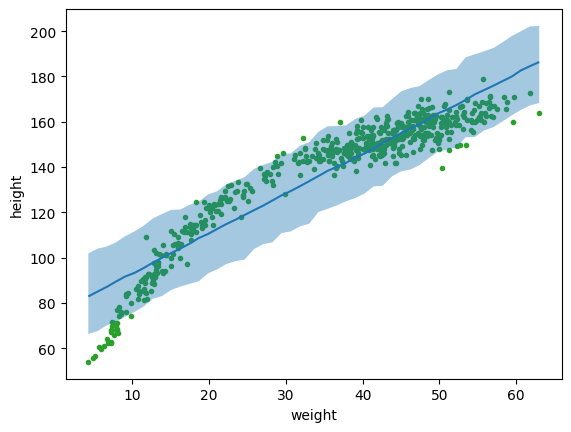

In [ ]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


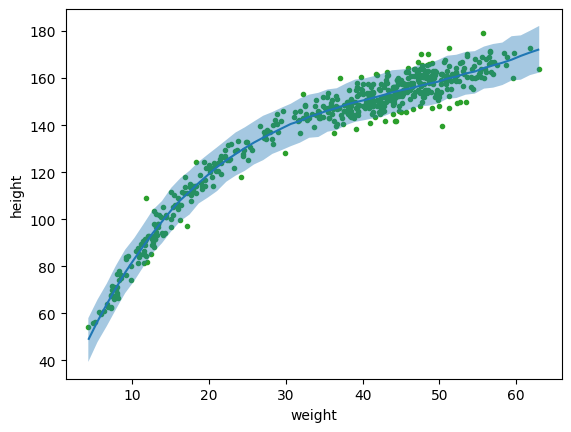

In [ ]:
bmb.interpret.plot_predictions(model_poly_4, idata_poly_4, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

<Axes: xlabel='height'>

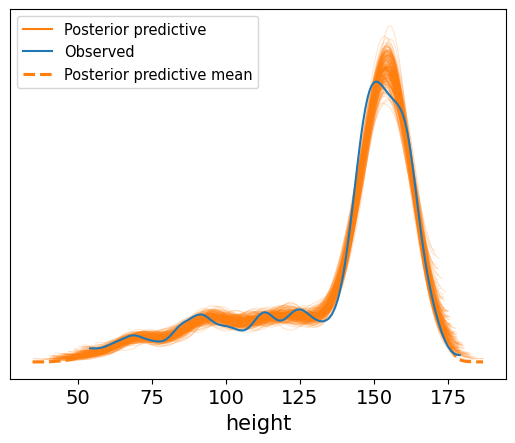

In [ ]:
az.plot_ppc(idata_poly_4, num_pp_samples=200, colors=["C1", "C0", "C1"])

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**Answer6:**

More complex covariance functions can be constructed by composing base covariance functions in several ways. For instance, two of the most commonly used operations are

1. The sum of two covariance functions is a covariance function

2. The product of two covariance functions is a covariance function

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

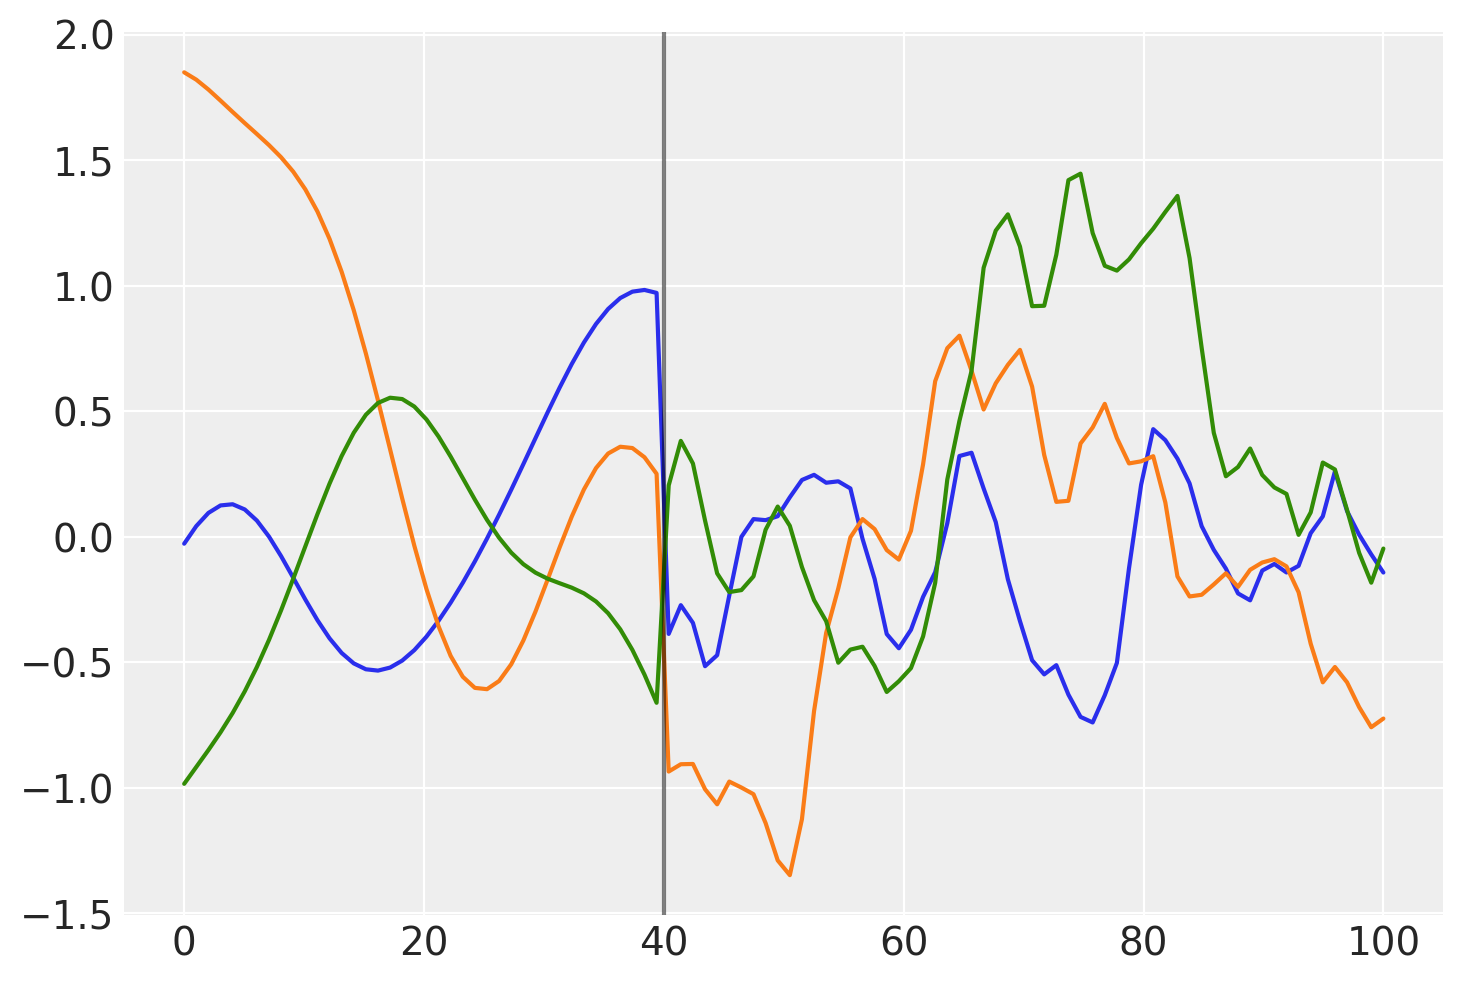

**Answer7:**

This is a graph of samples from a Gaussian Process prior with a changepoint covariance function. It shows that before $x = 40$, the function is smooth and slow changing, but after $x = 40$, the function is erratic and changes quickly.

This graph is my favorite because:

1. I can actually somewhat understand this graph, which is something I can't say for a lot of the other ones.
2. It's neat and clear: the difference between $x < 40$ and $x > 40$ is distinct and unmissable.
3. It leads nicely into the next section of the article: a smooth transition instead of the abrupt one we just saw.

I'll link the smooth transition one below for reference.



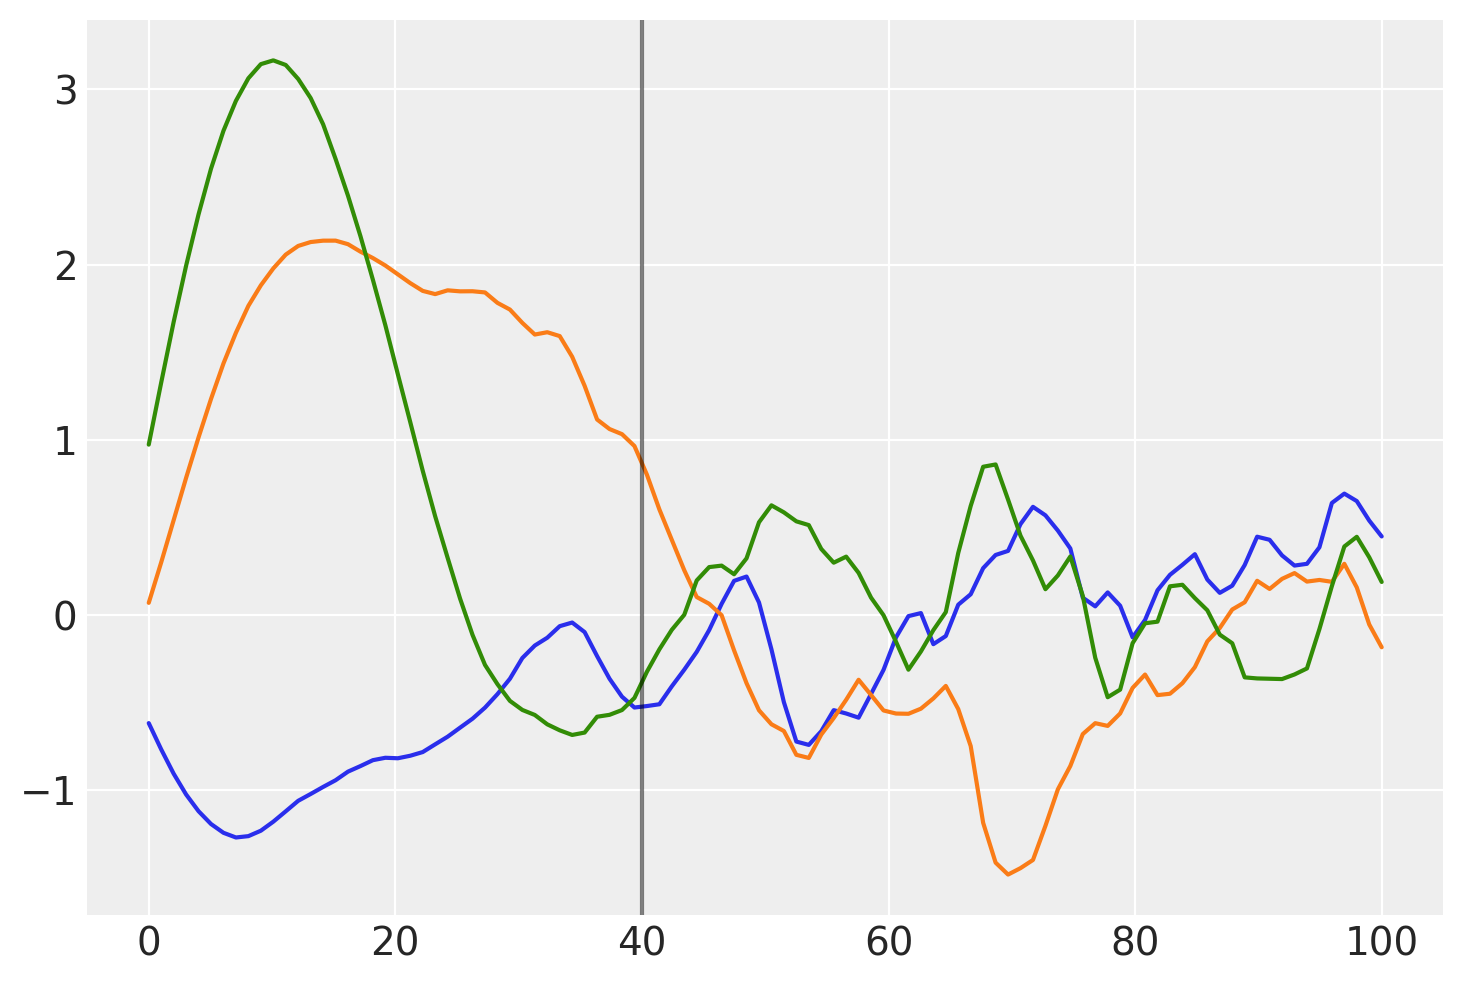